In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-24 22:07:14,112 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:07:14,115 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:07:14,116 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:07:14,117 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:07:14,118 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:07:14,118 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:07:14,144 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-24 22:07:14,730 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:07:14,790 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:07:14,792 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:07:14,792 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:07:14,793 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:07:15,397 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:07:15,492 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:07:15,493 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:07:15,494 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:07:15,495 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:07:15,496 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:07:15,496 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-24 22:07:16,387 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:07:16,388 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:07:16,389 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:07:16,390 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:07:17,159 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [5]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [6]:
"""
Pseudocode: 
1) Check if there are multiple somas associated with that segment

"""

'\nPseudocode: \n1) Check if there are multiple somas associated with that segment\n\n'

In [7]:
axon_segs = dj.U("segment_id") & (minnie.DecompositionAxon() 
                      & minnie.AutoProofreadValidationSegment4() - minnie.AutoProofreadValidationSegmentExclude4() )
axon_segs

segment_id segment id unique within each Segmentation


In [8]:
"""
Pseudocode: 
1) Find the coordinates of the nucleus for that new segment
2) Make sure that same number of DecompositionAxon objects as in Decomposition
3) Pick the neuron object that is closest and within a certain range of the nucleus
4) Download the neuron object
5) Run the proofreading
6) Save off the validation df
"""

'\nPseudocode: \n1) Find the coordinates of the nucleus for that new segment\n2) Make sure that same number of DecompositionAxon objects as in Decomposition\n3) Pick the neuron object that is closest and within a certain range of the nucleus\n4) Download the neuron object\n5) Run the proofreading\n6) Save off the validation df\n'

In [9]:
val_table = minnie.AutoProofreadValidationScore6() * minnie.AutoProofreadValidationSegmentMap4()
val_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5280,7,39,4,0.9926677946982515,0.9992429977289932,0.995944543996982,530.88,864691135585319036,True,True,full,1,0,0,0,
88.00,223037,864691136227167569,0.08,0,=BLOB=,63.375728490237755,=BLOB=,=BLOB=,0,450,0,0,nan,nan,nan,1,3416,3853,0,0.0002594706798131811,1.0,0.0005188067444876783,384.12,864691135538120050,True,True,full,2,0,0,0,
88.00,225498,864691135753932237,0.08,0,=BLOB=,185.8554437449504,=BLOB=,=BLOB=,6,77,0,5,1.0,0.5454545454545454,0.7058823529411764,1124,0,0,9,1.0,0.9920564872021183,0.9960124058484714,148.89,864691135564655959,True,True,full,1,0,0,0,
88.00,230236,864691135609687047,0.08,0,=BLOB=,1401.7516788382673,=BLOB=,=BLOB=,31,552,9,19,0.775,0.62,0.6888888888888889,1960,22,1,2,0.9994900560938297,0.9989806320081549,0.99923527912312,709.59,864691135748568361,True,True,full,1,0,0,0,
88.00,236197,864691136903144370,0.08,0,=BLOB=,40.753447012345966,=BLOB=,=BLOB=,0,974,0,6,nan,0.0,nan,2750,2333,3,48,0.9989102796948783,0.9828448892065761,0.9908124662223023,574.58,864691135758569550,True,True,full,2,0,2,0,
88.00,258307,864691135293126156,0.08,0,=BLOB=,639.4047428112395,=BLOB=,=BLOB=,7,342,10,63,0.4117647058823529,0.1,0.16091954022988506,2983,7,25,20,0.991688829787234,0.9933399933399933,0.9925137248377973,401.35,864691136194042326,True,True,full,1,0,0,0,
88.00,262773,864691136023889209,0.08,0,=BLOB=,183.47810007157142,=BLOB=,=BLOB=,10,47,2,0,0.8333333333333334,1.0,0.9090909090909091,724,0,2,10,0.9972451790633609,0.9863760217983651,0.9917808219178083,110.48,864691135233108569,True,True,full,1,0,0,0,
88.00,264870,864691136951664863,0.08,0,=BLOB=,1173.2836052703515,=BLOB=,=BLOB=,29,399,25,3,0.5370370370370371,0.90625,0.6744186046511628,2008,26,3,33,0.9985082048731975,0.9838314551690348,0.9911154985192497,506.46,864691135740225387,True,True,full,1,0,0,0,
88.00,269247,864691135584074360,0.08,0,=BLOB=,2117.67420548353,=BLOB=,=BLOB=,215,10,4,55,0.9817351598173516,0.7962962962962963,0.8793456032719836,805,0,7,66,0.9913793103448276,0.9242250287026407,0.9566250742721331,544.03,864691136105498585,True,True,full,1,0,0,0,
88.00,269380,864691135974639471,0.08,0,=BLOB=,444.913697558688,=BLOB=,=BLOB=,28,257,4,10,0.875,0.7368421052631579,0.7999999999999999,1863,4,8,3,0.9957242116515232,0.9983922829581994,0.9970564624029972,186.86,864691134988386682,True,True,full,1,0,0,0,


In [ ]:
val_table & "old_segment_id=864691135771629819"

In [31]:
bad_presyn_table = (minnie.AutoProofreadValidationScore6() & "pre_recall<0.2" & "pre_fn>30")
bad_presyn_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,258307,864691135293126156,0.08,0,=BLOB=,639.4047428112395,=BLOB=,=BLOB=,7,342,10,63,0.4117647058823529,0.1,0.16091954022988506,2983,7,25,20,0.991688829787234,0.9933399933399933,0.9925137248377973,339.83
88.00,525758,864691135367033849,0.08,0,=BLOB=,128.36705288762317,=BLOB=,=BLOB=,0,92,0,54,nan,0.0,nan,3986,4,19,2,0.9952559300873908,0.9994984954864594,0.9973727011134742,231.98
88.00,559381,864691135809608652,0.08,0,=BLOB=,76.31995568275894,=BLOB=,=BLOB=,0,149,0,142,nan,0.0,nan,4328,0,0,16,1.0,0.996316758747698,0.9981549815498155,458.59
88.00,582011,864691135358995288,0.08,1,=BLOB=,77.79308077921245,=BLOB=,=BLOB=,2,660,4,43,0.3333333333333333,0.044444444444444446,0.0784313725490196,4342,3407,10,14,0.9977022058823529,0.9967860422405876,0.9972439136426274,404.64
88.00,582056,864691135975539779,0.08,0,=BLOB=,203.57597245599766,=BLOB=,=BLOB=,3,40,0,33,1.0,0.08333333333333333,0.15384615384615385,6628,2,10,2,0.9984935221452245,0.9996983408748115,0.9990955682845946,462.17
88.00,582412,864691135753917645,0.08,0,=BLOB=,139.41405166007894,=BLOB=,=BLOB=,0,162,0,44,nan,0.0,nan,3048,23,622,23,0.8305177111716622,0.9925105828720286,0.9043168669336894,333.81


In [ ]:
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>100")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
bad_postsyn_table = (minnie.AutoProofreadValidationScore5() & "post_fn>200")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
import datajoint as dj
dj.config["display.limit"] = 30
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>10")
bad_presyn_seg_ids = bad_presyn_table.fetch("segment_id")
bad_presyn_table

In [ ]:
# multi_soma_keys = (minnie.AutoProofreadValidationSegmentMap4() & "n_somas>1"
#                       & minnie.DecompositionAxon.proj(old_segment_id="segment_id")
#                   & dict(segment_id = 864691135415710906)).proj().fetch(as_dict=True)
# key = multi_soma_keys[0]
# key

In [91]:
segment_id = 864691135584074360
segment_id = 864691135517422218
segment_id = 864691136951664863
segment_id = 864691135446675028
segment_id = 864691135367058169
segment_id = 864691135117980637
segment_id = 864691135761634358

# debugging the lower recall
segment_id = 864691135293126156
segment_id = 864691135367033849

#debugging the intersection at synapse
segment_id = 864691135446675028
key = dict(segment_id=segment_id)

In [92]:
verbose = True

segment_id = key["segment_id"]
if verbose:
    print(f"\n-- Working on neuron {segment_id}---")

segment_map_dict = (minnie.AutoProofreadValidationSegmentMap4() & dict(segment_id=segment_id)).fetch1()

#1) Find the coordinates of the nucleus for that new segment
nucleus_id = segment_map_dict["nucleus_id"]
nuc_center_coords = du.nuclei_id_to_nucleus_centers(nucleus_id)
if verbose:
    print(f"nuc_center_coords = {nuc_center_coords}")

#2) Make sure that same number of DecompositionCellType objects as in Decomposition
old_segment_id = segment_map_dict["old_segment_id"]
if verbose:
    print(f"old_segment_id = {old_segment_id}")

search_key = dict(segment_id=old_segment_id)
n_somas = len(minnie.BaylorSegmentCentroid() & search_key)
n_decomp_axon = len(minnie.DecompositionCellType() & search_key)
if verbose:
    print(f"# of somas = {n_somas} and # of DecompositionCellType = {n_decomp_axon}")


if n_somas != n_decomp_axon:
    raise Exception(f"# of somas = {n_somas} NOT MATCH # of DecompositionCellType = {n_decomp_axon}")

#3) Pick the neuron object that is closest and within a certain range of the nucleus
neuron_objs,split_idxs = du.decomposition_with_spine_recalculation(old_segment_id)
if n_somas > 1:
    """
    Finding the closest soma:
    1) For each neuron object get the mesh center of the soma object
    2) Find the distance of each from the nucleus center
    3) Find the arg min distance and make sure within threshold
    4) Mark the current neuron and the current split index
    """
    nuclei_distance_threshold = 15000

    soma_center_coords = [k["S0"].mesh_center for k in neuron_objs]
    soma_distances = [np.linalg.norm(k-nuc_center_coords) for k in soma_center_coords]
    min_dist_arg = np.argmin(soma_distances)
    min_dist = soma_distances[min_dist_arg]

    if verbose:
        print(f"soma_distances = {soma_distances}")
        print(f"min_dist_arg = {min_dist_arg}, with min distance = {min_dist}")

    if min_dist > nuclei_distance_threshold:
        raise Exception(f"min_dist ({min_dist}) larger than nuclei_distance_threshold ({nuclei_distance_threshold})")

    neuron_obj = neuron_objs[min_dist_arg]
    split_index = split_idxs[min_dist_arg]

    if verbose:
        print(f"Winning split_index = {split_index}")
else:
    split_index = split_idxs[0]
    neuron_obj = neuron_objs[0]

    


-- Working on neuron 864691135446675028---
nuc_center_coords = [740608 741376 850200]
old_segment_id = 864691135212632448
# of somas = 1 and # of DecompositionCellType = 1
**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [99]:
filt_neuron.segment_id

864691135737374100

In [98]:
neuron_obj.segment_id

864691135212632448

In [100]:
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                filter_list = pru.v6_exc_filters(),
                                #filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = True,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)


*****Using v6 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}


Recieved another instance of Neuron class in init -- so just copying data


Branches Requested to Remove (WITH disconnect effect)
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data

--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
Current node skip distance was 1404.557742256938 but max skip distance was 1853.7587921385561
For 13 the skip distance was 1853.7587921385561 (for width [64.46984769353935, 164.90211011325368, 57.09385814166525])
downstream_branches = [ 1 12]
skipped_nodes = []
Total number of short_thick_endnodes_to_remove = 24
downstream_branches after remove_short_thick_endnodes = [1]
Total number of axon_spines = 23
downstream

Recieved another instance of Neuron class in init -- so just copying data

--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {'L4': array([16, 31])}


Branches Requested to Remove (WITH disconnect effect)
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


Recieved another instance of Neuron class in init -- so just copying data

--- Working on filter 4:
function = width_jump_up_dendrite
function __name__ = filter_away_width_jump_up_dendrite
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {}

--- Working on filter 5:
function = width_jump_up_axon
function __name__ = filter_away_width_jump_up_axon
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {}

--- Working on filter 6:
function = double_back_dendrite
function __name__ = filter_away_double_back_dendrite
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {}

--- Working on filter 7:
function = double_back_axon_thin
function __name__ = filter_away_double_back_axon_thin
function arguments = {}


Recieved another instance of Neuron class in init -- so ju

Recieved another instance of Neuron class in init -- so just copying data



 ---- Total time for applying filter: 207.1942174434662 -----

--- Finished Part 1: Filtering Neuron -----

---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 3779 
# of presyn: 416
# of postsyn: 3363

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 349
# of valid_syn_idx = 67
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 35
# of valid_syn_idx = 3328

---Step 4: add_error_synapses_to_neuron_obj---
Working on error_type = distance_errored
Working on error_type = mesh_errored
Total time for valid synapse objects = 0.02013397216796875

--- Limb L0 soma calculation time = 0.219

--- Limb L1 soma calculation time = 0.52

--- Limb L2 soma calculation time = 0.213

--- Limb L3 soma calculation time = 0.221

--- Limb L4 soma cal

Segment Id = 864691135212632448
Postsyn counts:
TP:3322
TN:8
FP:6
FN:27
Presyn counts:
TP:11
TN:374
FP:27
FN:4


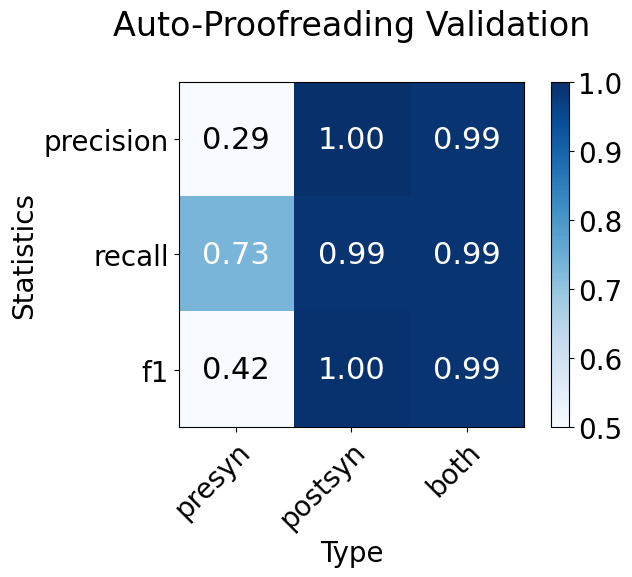

In [102]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [ ]:
# nviz.plot_axon(filt_neuron)

In [ ]:
# import neuron_visualizations as nviz
# nviz.visualize_neuron(filt_neuron,
#                       limb_branch_dict="all")

In [ ]:
minnie.DecompositionCellType() & dict(segment_id=filt_neuron.segment_id)

In [110]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the high degree branching

In [88]:
import error_detection as ed
ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                             plot_limb_branch_errors=True,
                                             verbose = True)



 ----- Working on limb L3-------


 ----- Working on branch 0/107: 0--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 1/107: 1--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 2/107: 2--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 3/107: 3--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 4/107: 4--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 5/107: 5--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 6/107: 6--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 7/107: 7--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 8/107: 8--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 9/107: 9--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 10/107: 

winning_downstream = 93,error_downstream = [36 94] 


 ----- Working on branch 92/107: 93--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 93/107: 94--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 94/107: 95--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 95/107: 96--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 96/107: 97--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 97/107: 98--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 98/107: 99--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 99/107: 100--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 100/107: 101--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 101/107: 102--------
winning_downstream = None,error_downstream

{'L3': array([39, 49, 61, 64, 68, 70, 71, 73, 83, 86, 36, 94])}

In [87]:
au.short_thick_branches_limb_branch_dict?

In [72]:
nru.upstream_node(neuron_obj[3],13)

23

In [76]:
import neuron_searching as ns

In [83]:
nviz.visualize_branch_at_downstream_split(neuron_obj,3,nru.upstream_node(neuron_obj[3],95))

# of downstream targets = 3
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


downstream_branches = [95 96 97]
downstream_branches[0] = 95
web_size_faces:112
web_size_volume:126770386.6299982
web_size_skeleton:1495.7188352267115
web_size_ray_trace_percentile:383.77633670082804
web_bbox_ratios_max:2.4394031232987303
web_bbox_ratios_min:1.4994487233536047
web_volume_ratio:2.0655519046206767
web_cdf:0.673453
parent_n_large_boutons:1
parent_n_boutons:4
parent_no_bouton_median:52.749177771783295
parent_no_spine_median_mesh_center:55.9862231287584
child_no_bouton_median_min:148.32695910805484
child_no_bouton_median_diff_min:95.57778133627154
child_no_spine_median_mesh_center_min:148.32695910805484
child_no_spine_median_mesh_center_diff_min:92.34073597929644
child_angle_min:11.01
child_n_boutons_min:0
child_n_large_boutons_min:0
child_no_bouton_median_max:148.32695910805484
child_no_bouton_median_diff_max:95.57778133627154
child_no_spine_median_mesh_center_max:148.32695910805484
child_no_spine_median_mesh_center_diff_max:92.34073597929644
child_angle_max:123.04
child_n

In [80]:
au.axon_spines_limb_branch_dict(neuron_obj,
                               plot_axon_spines_branch_dict=True)

plot_axon_spines_branch_dict = {'L3': array([  5,  35,  45,  52,  56,  58,  59,  63,  69,  78,  81,  84,  87,
        97,  98, 105, 106])}
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


{'L3': array([  5,  35,  45,  52,  56,  58,  59,  63,  69,  78,  81,  84,  87,
         97,  98, 105, 106])}

In [79]:
au.short_thick_branches_limb_branch_dict(neuron_obj,
                                      plot_limb_branch_dict=True ,
                                        verbose = True)

limb_branch_dict before starting node removal:
{'L3': array([  5,  14,  15,  16,  20,  22,  30,  35,  45,  52,  59,  63,  69,
        78,  81,  84,  87,  95,  97, 101]), 'L5': array([6])}
limb_branch_dict AFTER starting node removal:
{'L3': array([  5,  14,  15,  16,  20,  22,  30,  35,  45,  52,  59,  63,  69,
        78,  81,  84,  87,  95,  97, 101]), 'L5': array([6])}
Filtered only those segments with a parent width of greater than 200:
limb_branch_dict = {'L3': array([14, 15, 16, 20, 22, 30]), 'L5': array([6])}
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


{'L3': array([14, 15, 16, 20, 22, 30]), 'L5': array([6])}

In [65]:
nviz.plot_objects(neuron_obj[3][30].mesh,
                 neuron_obj[3][30].skeleton)

In [62]:
au.axon_width(neuron_obj[3][13])

246.4220062760329

In [60]:
nru.upstream_node(neuron_obj[13],24)

KeyError: 'L13'

# Measuring the Downstream Synaptic Density

limb_name = L0
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L0 because was the limb in the first key


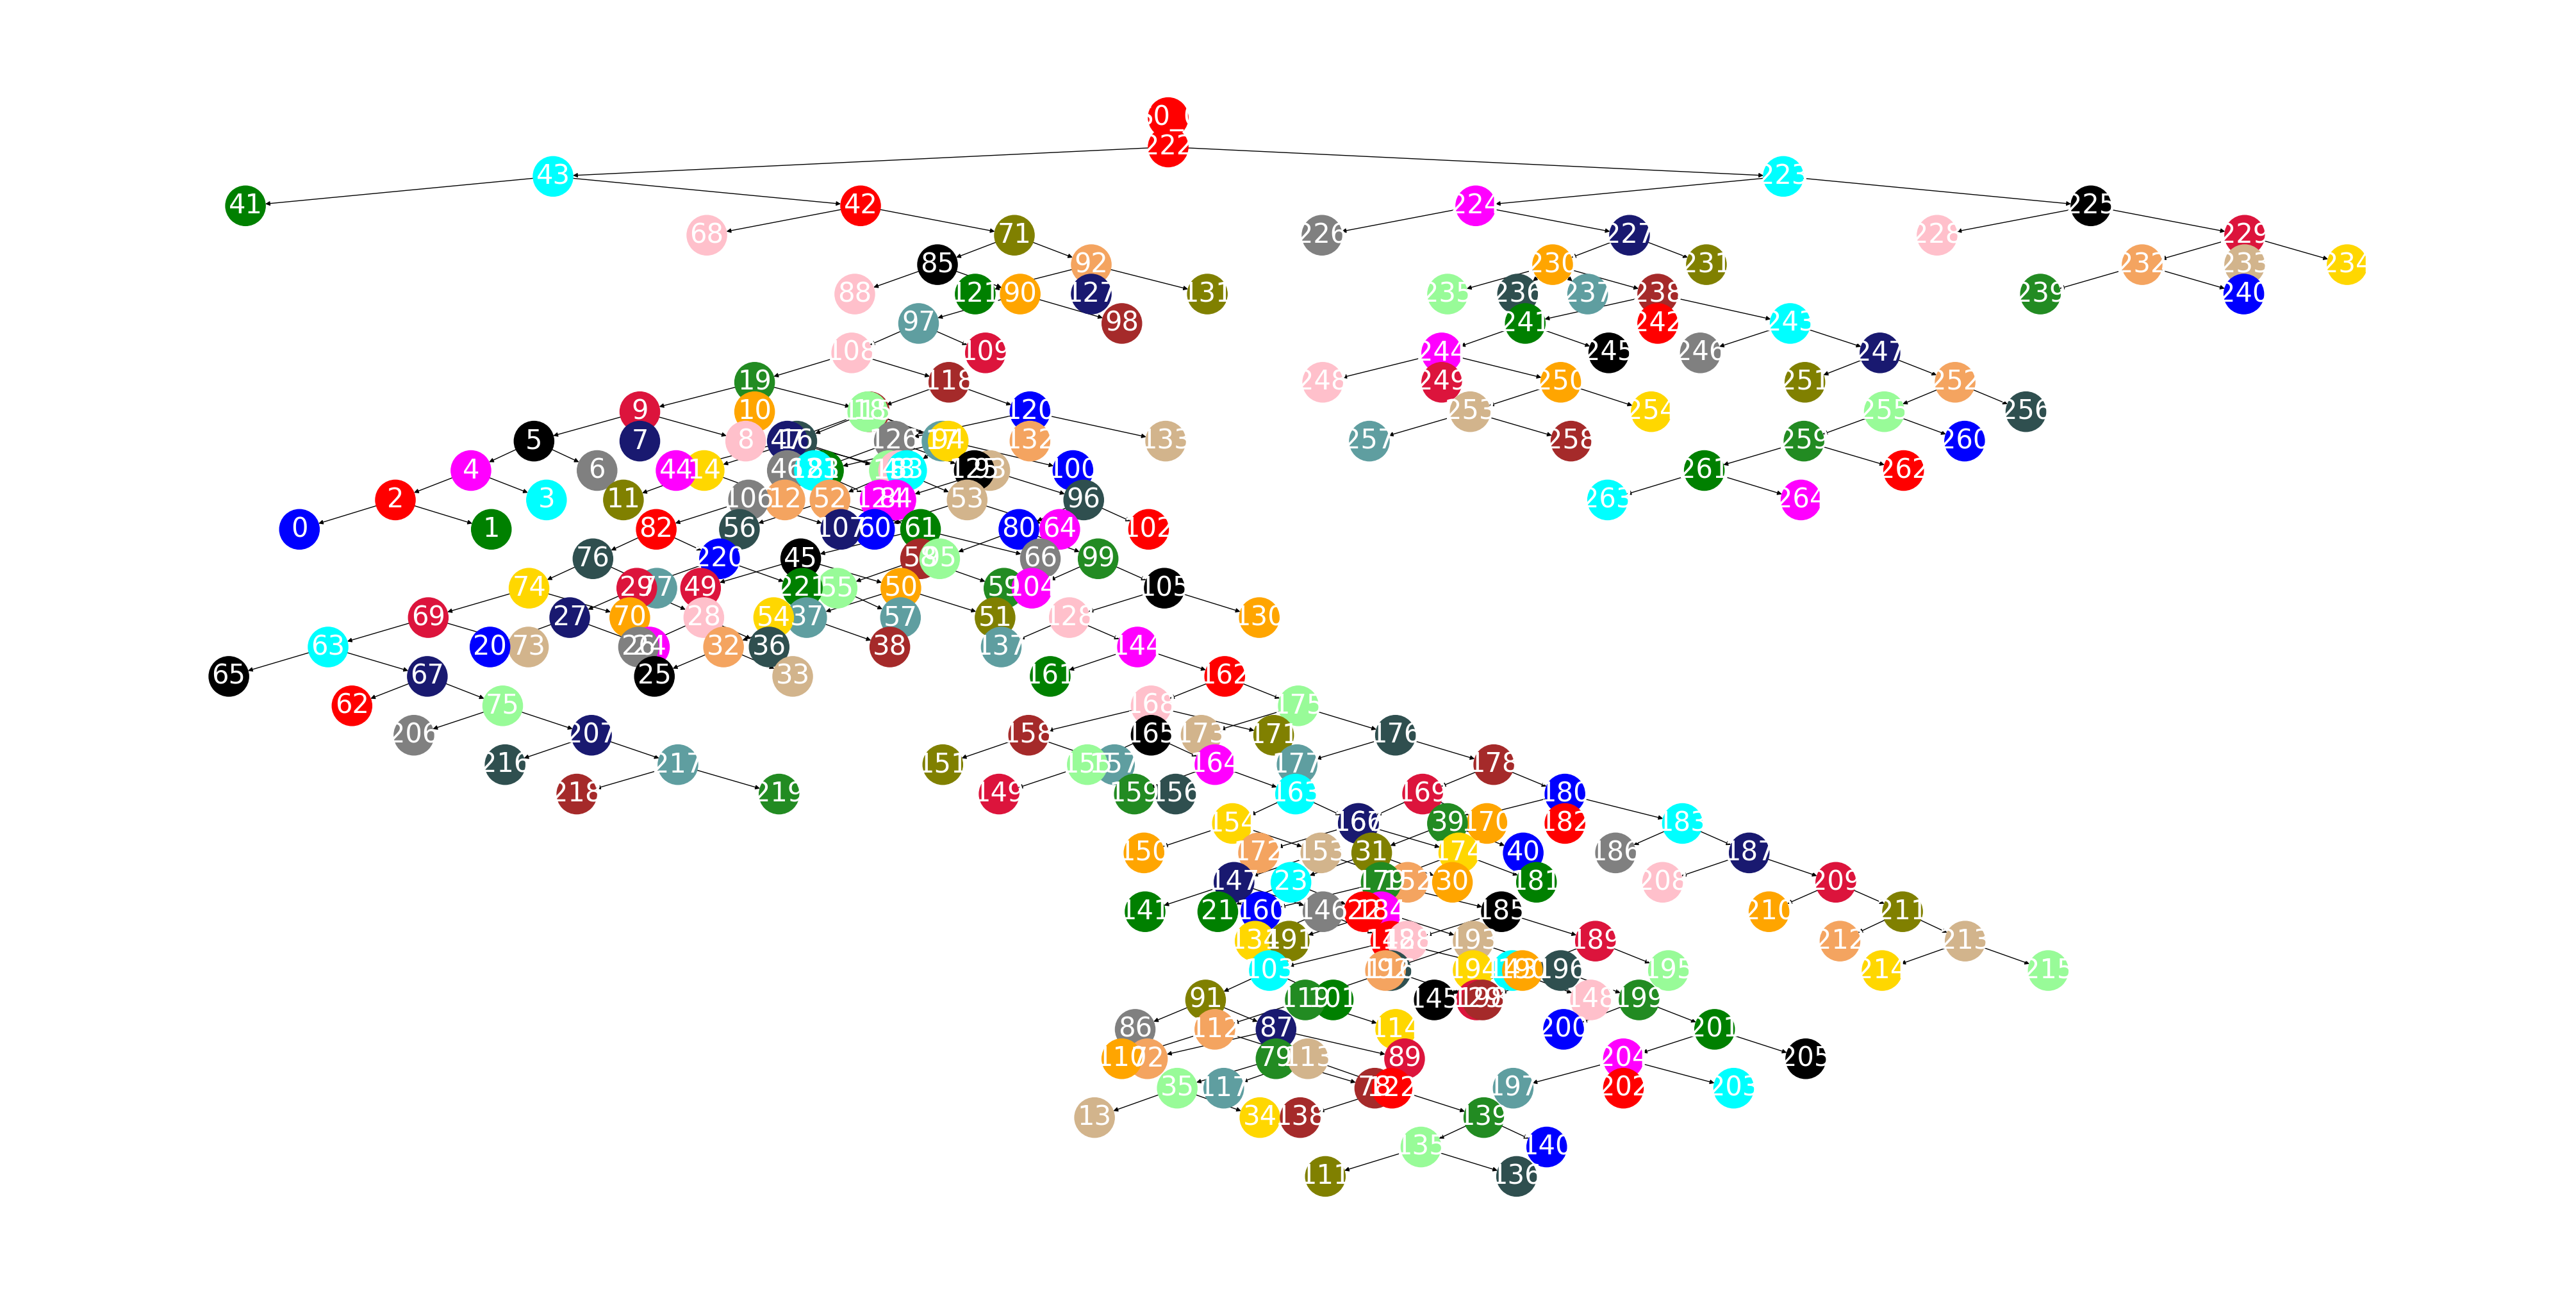

In [39]:
nviz.visualize_neuron_specific_limb(neuron_obj,
                                   neuron_obj.axon_limb_idx)

In [47]:
limb_obj = neuron_obj[0]
nviz.plot_limb_path(limb_obj,[118])

In [46]:
nru.upstream_node(limb_obj,120)

118

In [48]:
(limb_obj[118]).skeletal_length

1608.5535609834371

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,2)

In [ ]:
limb_obj = filt_neuron[2]
nru.upstream_node(limb_obj,57)

In [ ]:
branch_obj = limb_obj[58]
branch_obj.synapse_density_pre

In [ ]:
branch_obj = limb_obj[57]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

branch_obj = limb_obj[64]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

In [ ]:
branch_obj = limb_obj[68]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

branch_obj = limb_obj[69]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

In [ ]:
nviz.plot_limb_path(limb_obj,[58,68,69])

In [ ]:
nviz.plot_objects(filt_neuron[2][64].mesh)

In [ ]:
import axon_utils as au

curr_web = curr_branch.web
au.valid_web_for_t(curr_web,
                                   size_threshold = 120,
                                   size_type = "ray_trace_median",
                                   above_threshold = True,
                                       verbose=True)

In [ ]:
curr_branch = filt_neuron[0][4]
nviz.plot_objects(curr_branch.mesh,
                 meshes=[curr_branch.web],
                 meshes_colors="red")

In [ ]:
import error_detection as ed
ed.webbing_t_errors_limb_branch_dict(filt_neuron,
                                    plot_two_downstream_thin_axon_limb_branch  = True,
                                    plot_wide_angled_children = True,
                                    plot_web_errors=True, 
                                     child_skeletal_threshold = 2000,
                                    verbose = True)

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,0)

# Debug 2: Looking at thick T errors

In [ ]:
nru.downstream_nodes(neuron_obj[1],15)

In [ ]:
ed.skip_distance_from_branch_width(neuron_obj[1][15].width)

In [ ]:
neuron_obj[1][20].skeletal_length

In [ ]:
nviz.plot_limb_branch_dict(neuron_obj,dict(L1=[15]))

In [ ]:
au.axon_width(filt_neuron[1][13]),au.axon_width(filt_neuron[1][14])

In [ ]:
import error_detection as ed
ed.thick_t_errors_limb_branch_dict(neuron_obj,
        axon_only = True,
        parent_width_maximum = 70,
        min_child_width_max = 80,
        child_skeletal_threshold = 7000,
        plot_two_downstream_thin_axon_limb_branch = False,
        plot_wide_angled_children = True,
        plot_thick_t_crossing_limb_branch = True,
        plot_t_error_limb_branch = True,
        verbose = True)

# Debug 1: Looking through all of the high degree branching points

In [ ]:
ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                              plot_limb_branch_errors=True,
                                             high_degree_order_verbose=False)

In [13]:
"""
Pseudocode: 
1) Get the branch names of all those considered for the high degree branching points

"""
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data


 ----- Working on limb L2-------


 ----- Working on branch 0/217: 0--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 1/217: 1--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 2/217: 2--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 3/217: 3--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 4/217: 4--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 5/217: 5--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 6/217: 6--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 7/217: 7--------
winning_downstream = None,error_downstream = [] 


 -----

winning_downstream = 100,error_downstream = [ 96 101] 


 ----- Working on branch 91/217: 91--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 92/217: 92--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 93/217: 93--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 94/217: 94--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 95/217: 95--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 96/217: 96--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 97/217: 97--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 98/217: 98--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 99/217: 99--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 100/217: 100--------
winning_downstream = None,error_downstream

winning_downstream = None,error_downstream = [171 172 173] 


 ----- Working on branch 175/217: 175--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 176/217: 176--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 177/217: 177--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 178/217: 178--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 179/217: 179--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 180/217: 180--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 181/217: 181--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 182/217: 182--------
***Branch being considered after filters = 182***
winning_downstream = 176,error_downstream = [178 181] 


 ----- Working on branch 183/217: 183--------
***Branch being considered after filters = 183***
winning_do

Synapsse Results:
Total Number of Synapses = 4363
n_valid_syn_ids_presyn = 103
n_errored_syn_ids_presyn = 606
n_valid_syn_ids_postsyn = 3654
n_errored_syn_ids_postsyn = 0
Synapsse Results:
Total Number of Synapses = 4363
n_valid_syn_ids_presyn = 103
n_errored_syn_ids_presyn = 606
n_valid_syn_ids_postsyn = 3654
n_errored_syn_ids_postsyn = 0

--- Finished Part 3: Generating Validation Dataframe -----


limb_name = L2
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L2 because was the limb in the first key


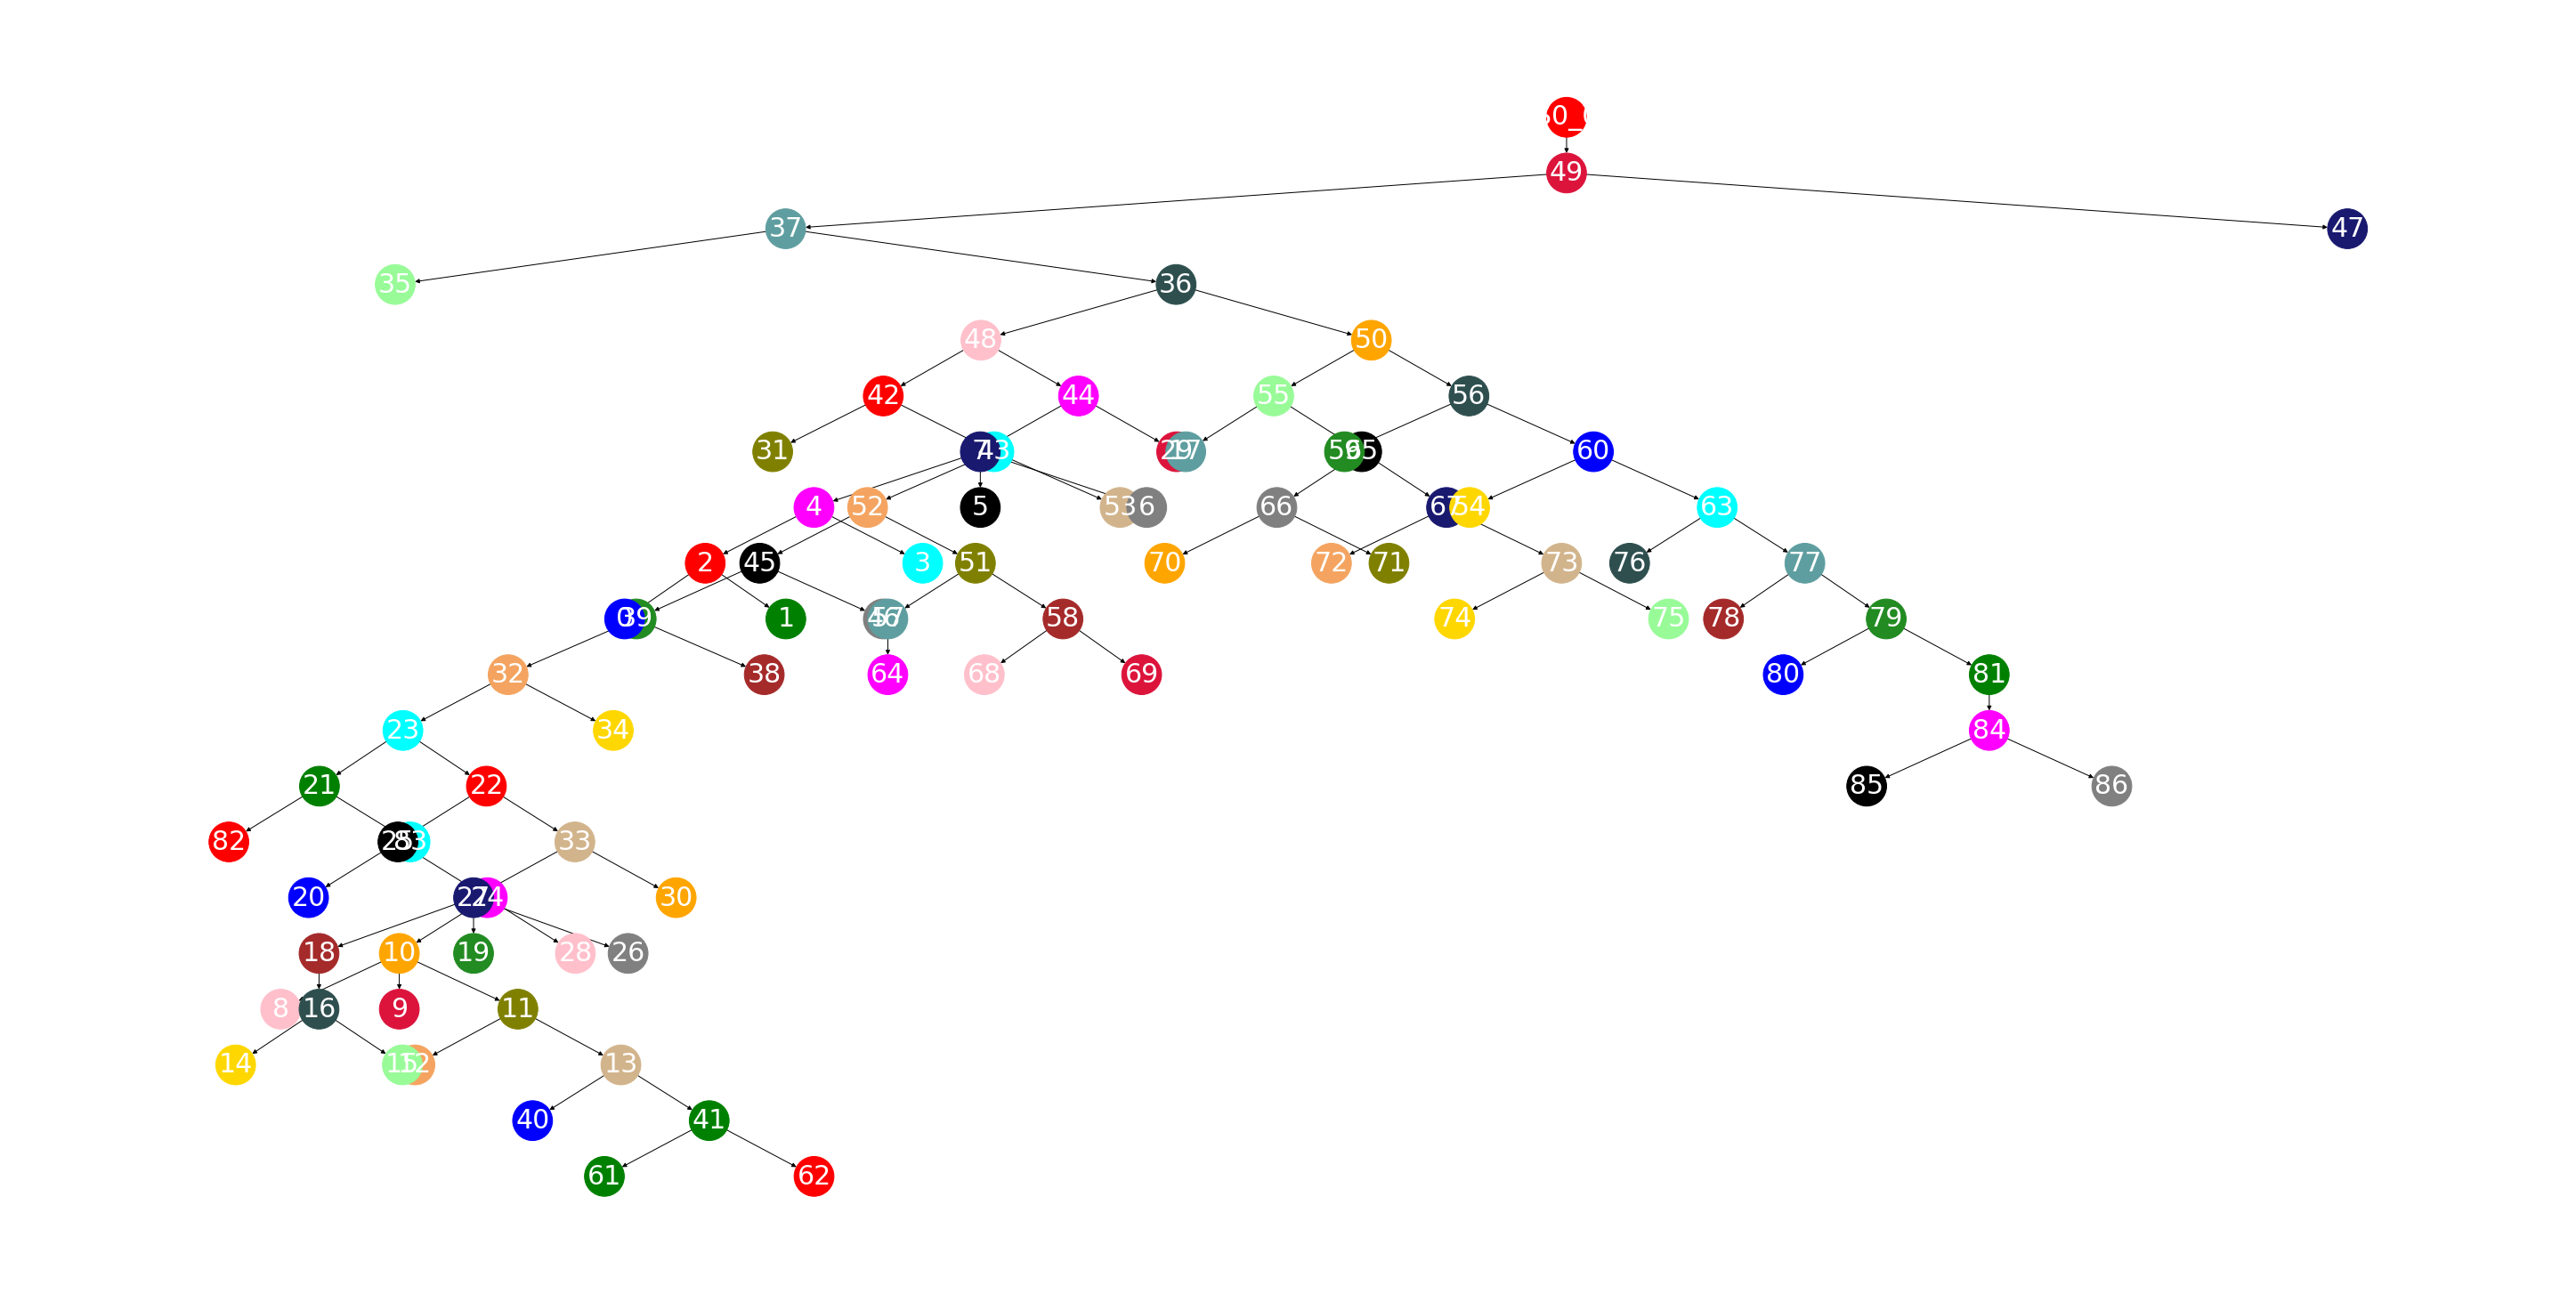

In [14]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   2)

In [20]:
nru.upstream_node(limb_obj,24)

25

In [21]:
import axon_utils as au
au.axon_width(limb_obj[25])

108.41856966949315

In [22]:
limb_obj = filt_neuron[2]
nviz.plot_objects(limb_obj[25].mesh)

In [23]:
(filt_neuron_2,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data


 ----- Working on limb L2-------


 ----- Working on branch 0/87: 0--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 1/87: 1--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 2/87: 2--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 3/87: 3--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 4/87: 4--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 5/87: 5--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 6/87: 6--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 7/87: 7--------
winning_downstream = None,error_downstream = [] 


 ----- Working


---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 4363 
# of presyn: 709
# of postsyn: 3654

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 135
# of valid_syn_idx = 574
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 0
# of valid_syn_idx = 3654

---Step 4: add_error_synapses_to_neuron_obj---
Working on error_type = distance_errored
Working on error_type = mesh_errored
Total time for valid synapse objects = 0.000990152359008789

--- Limb L0 soma calculation time = 0.474

--- Limb L1 soma calculation time = 1.388

--- Limb L2 soma calculation time = 1.846

--- Limb L3 soma calculation time = 0.168

--- Limb L4 soma calculation time = 0.071

--- Limb L5 soma calculation time = 0.056

--- Limb L6 soma calculation time = 0.068

--- Limb L7 soma calculation time = 0.03

--- Limb L8 soma calculation ti

KeyboardInterrupt: 

In [ ]:
nru.downstream_nodes(filt_neuron[1],9)

In [ ]:
limb_obj = filt_neuron[1]
nviz.plot_limb_path(limb_obj,[9,8,7])

In [ ]:
[au.axon_width(limb_obj[k]) for k in [9,8,7]]

In [ ]:
limb_obj[7].skeletal_length

In [ ]:
nviz.plot_objects(filt_neuron[1][43].mesh)

In [ ]:
#branches_to_check = [50,102,121,136,147,152,163,173,224,227,260]
branches_to_check = [53,185,177,154,138,124,115,108,92,14]

In [ ]:
curr_idx = 9

limb_idx = 1
limb_obj = neuron_obj[limb_idx]

curr_branch = branches_to_check[curr_idx] 
nviz.visualize_branch_at_downstream_split(neuron_obj,
                                          limb_idx,
                                          curr_branch,
                                          print_axon_border_info=False,
                                         limb_branch_synapses=True)

In [ ]:
import error_detection as ed


ed.high_degree_upstream_match(limb_obj,
                             branch_idx = curr_branch,
                              plot_starting_branches = True,
                             plot_extracted_skeletons = False,
                             plot_G_local_edge = True,
                              plot_G_global_edge = True,
                              plot_G_node_edge = True,
                              plot_G_exclusive_partner_edge = True,
                              plot_final_branch_matches = True
                             )